In [20]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [21]:
# Define data filepath
pathname = './wildfire/'

# Read data
df = gpd.read_file(pathname + 'or_1992-2018.shp') # 'df' stands for DataFrame

In [22]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,FIRE_SIZE,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
0,1586162.0,201604465,SFO-2012ORODF1272303413,NONFED,ST-NASF,ST/C&L,USORORS,Oregon Department of Forestry Salem Headquarters,ORODF,Oregon Department of Forestry,...,0.50,B,42.23861,-124.39472,PRIVATE,OR,Curry,41015,Curry County,POINT (-124.39472 42.23861)
1,1216678.0,1475171,W-610834,FED,DOI-WFMI,BLM,USORCBD,Coos Bay District,ORCBD,Coos Bay District,...,0.10,A,42.25190,-124.37890,PRIVATE,OR,Curry,41015,Curry County,POINT (-124.37890 42.25190)
2,1826690.0,300247467,SFO-2015ORODF1572310116,NONFED,ST-NASF,ST/C&L,USORORS,Oregon Department of Forestry Salem Headquarters,ORODF,Oregon Department of Forestry,...,0.37,B,42.25417,-124.39250,PRIVATE,OR,Curry,41015,Curry County,POINT (-124.39250 42.25417)
3,1986235.0,400114024,SFO-2017ORODF1772303518,NONFED,ST-NASF,ST/C&L,USORORS,Oregon Department of Forestry Salem Headquarters,ORODF,Oregon Department of Forestry,...,0.01,A,42.26792,-124.39972,STATE,OR,Curry,41015,Curry County,POINT (-124.39972 42.26792)
4,1145371.0,1397051,ODF-86539,NONFED,ST-ORORS,ST/C&L,USOR723S,Gold Beach Unit,ORODF-723,Gold Beach Unit,...,148.00,D,42.27306,-124.40250,STATE,OR,8,41015,Curry County,POINT (-124.40250 42.27306)


In [23]:
# Filter fires larger than 50 acres
df_large50 = df[df['FIRE_SIZE'] > 50]

In [24]:
# Filter fires that were caused by human causes
df_large_human = df_large50[df_large50['NWCG_CAUSE'] == 'Human']

In [25]:
# Find date of discovery
df_large_human['DISCOVERY_']

4        2010/07/20 00:00:00.000
84       2001/06/01 00:00:00.000
86       2000/07/21 00:00:00.000
93       2001/06/14 00:00:00.000
97       2006/07/28 00:00:00.000
                  ...           
66883    2012/05/16 00:00:00.000
66920    1996/09/26 00:00:00.000
66966    2000/07/09 00:00:00.000
66999    1994/06/25 00:00:00.000
67015    2012/07/18 00:00:00.000
Name: DISCOVERY_, Length: 971, dtype: object

In [26]:
df_large_human.groupby('FIPS_NAME').count().sort_values(by='OBJECTID').iloc[-1]

OBJECTID      71
FOD_ID        71
FPA_ID        71
SOURCE_SYS    71
SOURCE_S_1    71
NWCG_REPOR    71
NWCG_REP_1    71
NWCG_REP_2    71
SOURCE_REP    71
SOURCE_R_1    71
LOCAL_FIRE    33
LOCAL_INCI    29
FIRE_CODE     46
FIRE_NAME     71
ICS_209_PL    27
ICS_209__1     0
MTBS_ID       17
MTBS_FIRE_    17
COMPLEX_NA     0
FIRE_YEAR     71
DISCOVERY_    71
DISCOVER_1    71
DISCOVER_2    58
NWCG_CAUSE    71
NWCG_GENER    71
NWCG_CAU_1     1
CONT_DATE     69
CONT_DOY      69
CONT_TIME     55
FIRE_SIZE     71
FIRE_SIZE_    71
LATITUDE      71
LONGITUDE     71
OWNER_DESC    71
STATE         71
COUNTY        71
FIPS_CODE     71
geometry      71
Name: Wasco County, dtype: int64

The County with the largest amount of fires greater than 50 acres is Wasco county

In [27]:
# Filter fires larger than 100 acres
df_large100 = df[df['FIRE_SIZE'] > 100]

In [28]:
# Filter fires that were caused by natural causes
df_large_natural = df_large100[df_large100['NWCG_CAUSE'] == 'Natural']

In [29]:
# Find date of discovery
df_large_natural['DISCOVERY_']

56       2008/07/02 00:00:00.000
89       2000/07/22 00:00:00.000
95       2007/08/31 00:00:00.000
96       2003/06/29 00:00:00.000
109      2007/07/13 00:00:00.000
                  ...           
67007    2017/08/29 00:00:00.000
67008    2011/09/15 00:00:00.000
67014    2014/09/16 00:00:00.000
67017    2013/08/07 00:00:00.000
67022    2016/08/17 00:00:00.000
Name: DISCOVERY_, Length: 1164, dtype: object

In [30]:
datetime = pd.to_datetime(df_large_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
datetime

56      2008-07-02
89      2000-07-22
95      2007-08-31
96      2003-06-29
109     2007-07-13
           ...    
67007   2017-08-29
67008   2011-09-15
67014   2014-09-16
67017   2013-08-07
67022   2016-08-17
Name: DISCOVERY_, Length: 1164, dtype: datetime64[ns]

In [31]:
df_large_natural['datetime'] = datetime # Sorry about the warning, extra credit if someone can fix this!

C:\Users\zenon\anaconda3\envs\lab2\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [32]:
# Find number of large fires in each year (i.e. number of rows in each year)
large_fire_count = df_large100.iloc[:,0].groupby(df_large_natural['datetime'].dt.month).count()

print (large_fire_count)

datetime
4.0       2
5.0       6
6.0      98
7.0     410
8.0     549
9.0      93
10.0      6
Name: OBJECTID, dtype: int64


The month with the most wildfires is August (8.0) with 549

In [33]:
df_large_natural.groupby('datetime').count().sort_values(by='OBJECTID').iloc[-1]

OBJECTID      17
FOD_ID        17
FPA_ID        17
SOURCE_SYS    17
SOURCE_S_1    17
NWCG_REPOR    17
NWCG_REP_1    17
NWCG_REP_2    17
SOURCE_REP    17
SOURCE_R_1    17
LOCAL_FIRE    10
LOCAL_INCI     0
FIRE_CODE     17
FIRE_NAME     17
ICS_209_PL    13
ICS_209__1     0
MTBS_ID        9
MTBS_FIRE_     9
COMPLEX_NA    10
FIRE_YEAR     17
DISCOVERY_    17
DISCOVER_1    17
DISCOVER_2    17
NWCG_CAUSE    17
NWCG_GENER    17
NWCG_CAU_1     0
CONT_DATE     17
CONT_DOY      17
CONT_TIME     17
FIRE_SIZE     17
FIRE_SIZE_    17
LATITUDE      17
LONGITUDE     17
OWNER_DESC    17
STATE         17
COUNTY        13
FIPS_CODE     13
FIPS_NAME     13
geometry      17
Name: 2002-07-13 00:00:00, dtype: int64

In [34]:
df_large_natural.index

Int64Index([   56,    89,    95,    96,   109,   110,   161,   354,   666,
              795,
            ...
            66995, 67000, 67003, 67004, 67005, 67007, 67008, 67014, 67017,
            67022],
           dtype='int64', length=1164)

In [35]:
# Filter fires larger than 100 acres
df_large_200 = df[df['FIRE_SIZE'] > 200]

In [36]:
# Filter fires that were caused by undetermined causes
df_large_undetermined = df_large200[df_large200['NWCG_CAUSE'] == 'Missing data/not specified/undetermined']

NameError: name 'df_large200' is not defined

In [37]:
# Find date of discovery
df_large_undetermined['DISCOVERY_'].count()

NameError: name 'df_large_undetermined' is not defined

The total amount of undetermined wildfires greater than 200 acres is 13

In [38]:
# Filter fires larger than 100 acres
df_large100 = df[df['FIRE_SIZE'] > 100]

In [39]:
df_large100.sort_values(by='FIRE_SIZE').iloc[-1]

OBJECTID                                          1578392.0
FOD_ID                                            201508655
FPA_ID                                             W-649635
SOURCE_SYS                                              FED
SOURCE_S_1                                         DOI-WFMI
NWCG_REPOR                                              BLM
NWCG_REP_1                                          USORVAD
NWCG_REP_2                                    Vale District
SOURCE_REP                                            ORVAD
SOURCE_R_1                                    Vale District
LOCAL_FIRE                                             None
LOCAL_INCI                                             None
FIRE_CODE                                              G1HG
FIRE_NAME                                         LONG DRAW
ICS_209_PL                     2012_OR-VAD-000067_LONG DRAW
ICS_209__1                                             None
MTBS_ID                               OR

The name of the largest fire is Long Draw, Date is 2012/07/08, and the County is Malheur County

In [40]:
# Filter fires larger than 100 acres
df_large50 = df[df['FIRE_SIZE'] > 50]

In [41]:
df_large50.groupby('FIPS_NAME').count()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,geometry
FIPS_NAME,,,,,,,,,,,,,,,,,,,,,
Adams County,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Baker County,58,58,58,58,58,58,58,58,58,58,...,50,58,58,58,58,58,58,58,58,58
Benton County,5,5,5,5,5,5,5,5,5,5,...,3,5,5,5,5,5,5,5,5,5
Clackamas County,6,6,6,6,6,6,6,6,6,6,...,5,6,6,6,6,6,6,6,6,6
Clatsop County,3,3,3,3,3,3,3,3,3,3,...,2,3,3,3,3,3,3,3,3,3
Columbia County,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Coos County,8,8,8,8,8,8,8,8,8,8,...,2,8,8,8,8,8,8,8,8,8
Crook County,39,39,39,39,39,39,39,39,39,39,...,30,39,39,39,39,39,39,39,39,39
Curry County,14,14,14,14,14,14,14,14,14,14,...,6,14,14,14,14,14,14,14,14,14


33 fires in Lane county were greater than 50 acres in size

In [42]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

# Define product
acs = products.ACS(2019)

In [43]:
# Print list of tables
acs.filter_tables('POPULATION', by='description')

,description,columns
table_name,,
B01003,TOTAL POPULATION,[B01003_001E]
B05006,PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION...,"[B05006_001E, B05006_002E, B05006_003E, B05006..."
B05007,PLACE OF BIRTH BY YEAR OF ENTRY BY CITIZENSHIP...,"[B05007_001E, B05007_002E, B05007_003E, B05007..."
B05008,SEX BY PLACE OF BIRTH BY YEAR OF ENTRY FOR THE...,"[B05008_001E, B05008_002E, B05008_003E, B05008..."
B05013,SEX BY AGE FOR THE FOREIGN-BORN POPULATION,"[B05013_001E, B05013_002E, B05013_003E, B05013..."
...,...,...
C24030,SEX BY INDUSTRY FOR THE CIVILIAN EMPLOYED POPU...,"[C24030_001E, C24030_002E, C24030_003E, C24030..."
C24040,"SEX BY INDUSTRY FOR THE FULL-TIME, YEAR-ROUND ...","[C24040_001E, C24040_002E, C24040_003E, C24040..."
C24050,INDUSTRY BY OCCUPATION FOR THE CIVILIAN EMPLO...,"[C24050_001E, C24050_002E, C24050_003E, C24050..."


In [44]:
# Print list of variables
acs.filter_variables('B01003')

,label,concept,predicateType,group,limit,predicateOnly,attributes,required
B01003_001E,Estimate!!Total,TOTAL POPULATION,int,B01003,0,NaN,"B01003_001EA,B01003_001M,B01003_001MA",NaN


In [45]:
# Download data
lane_pop = products.ACS(2019).from_county('Lane County, OR', level='tract',
                                        variables=['B01003_001E']) # don't worry about the deprecation message!

C:\Users\zenon\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\lab2\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` paramete

In [46]:
# Calculate some stats
lane_pop['B01003_001E'].describe()

count      87.000000
mean     4291.264368
std      1506.689737
min         0.000000
25%      3287.500000
50%      4068.000000
75%      5205.000000
max      8932.000000
Name: B01003_001E, dtype: float64

<AxesSubplot:>

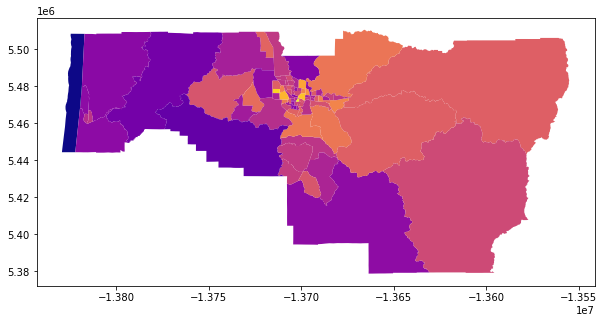

In [47]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
lane_pop.plot('B01003_001E', ax=ax, cmap='plasma')

<AxesSubplot:>

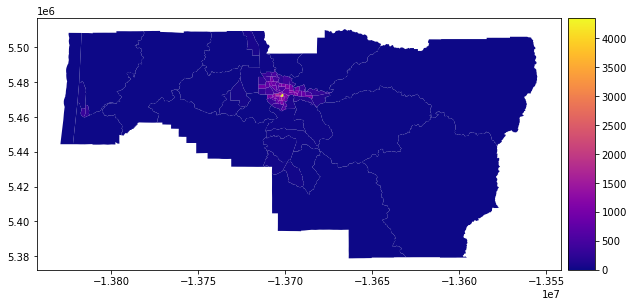

In [48]:
lane_pop['pop_density'] = lane_pop['B01003_001E'] / (lane_pop['geometry'].area / 1e+6)

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

lane_pop.plot('pop_density', ax=ax, cmap='plasma', legend=True, cax=cax)

In [49]:
lane_pop.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
# Make 
df_large = df[df['FIRE_SIZE'] > 100]
lane_fires = df_large[df_large['FIPS_NAME'] == 'Lane County']
lane_fires.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [51]:
lane_fires_proj = lane_fires.to_crs('EPSG:3857')
lane_fires_proj.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

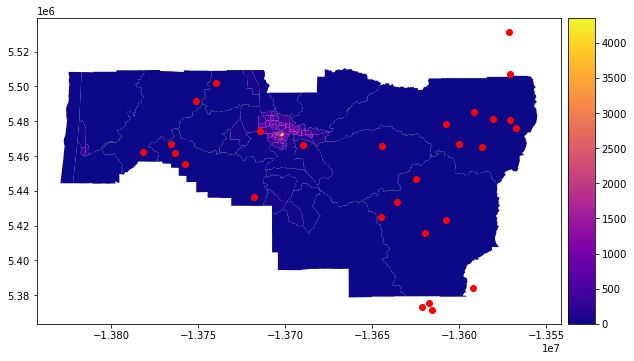

In [52]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

lane_pop.plot('pop_density', ax=ax, cmap='plasma', legend=True, cax=cax)
lane_fires_proj.plot(ax=ax, c='red')

In [53]:
# Download data
lane_pop = products.ACS(2019).from_county('Multnomah County, OR', level='tract',
                                        variables=['B23024_001E']) # don't worry about the deprecation message!

C:\Users\zenon\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\lab2\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` paramete

In [54]:
# Calculate some stats
lane_pop['B23024_001E'].describe()

count     171.000000
mean     3070.701754
std      1181.899498
min         0.000000
25%      2280.500000
50%      3044.000000
75%      3652.000000
max      6931.000000
Name: B23024_001E, dtype: float64

In [55]:
help(gpd.GeoDataFrame.plot)

Help on class GeoplotAccessor in module geopandas.plotting:

class GeoplotAccessor(pandas.plotting._core.PlotAccessor)
 |  GeoplotAccessor(data)
 |  
 |  Plot a GeoDataFrame.
 |  
 |  Generate a plot of a GeoDataFrame with matplotlib.  If a
 |  column is specified, the plot coloring will be based on values
 |  in that column.
 |  
 |  Parameters
 |  ----------
 |  column : str, np.array, pd.Series (default None)
 |      The name of the dataframe column, np.array, or pd.Series to be plotted.
 |      If np.array or pd.Series are used then it must have same length as
 |      dataframe. Values are used to color the plot. Ignored if `color` is
 |      also set.
 |  kind: str
 |      The kind of plots to produce:
 |       - 'geo': Map (default)
 |       Pandas Kinds
 |       - 'line' : line plot
 |       - 'bar' : vertical bar plot
 |       - 'barh' : horizontal bar plot
 |       - 'hist' : histogram
 |       - 'box' : BoxPlot
 |       - 'kde' : Kernel Density Estimation plot
 |       - 'den

<AxesSubplot:>

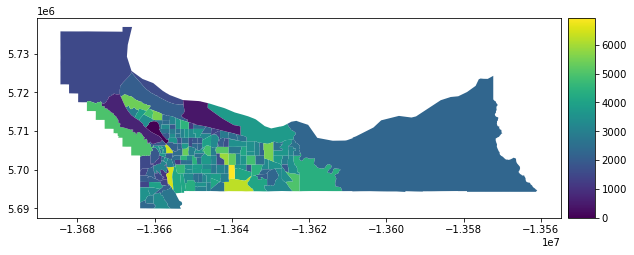

In [56]:
f, ax = plt.subplots(1, 1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
lane_pop.plot('B23024_001E', ax=ax, cmap='viridis', legend=True, cax=cax)

<AxesSubplot:>

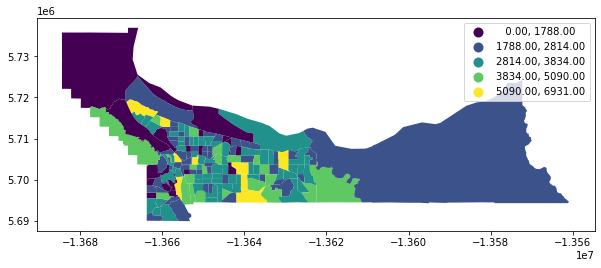

In [57]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
lane_pop.plot('B23024_001E', ax=ax, cmap='viridis', scheme = "NaturalBreaks", legend = True )

This choropleth map represents poverty status in the past 12 months by disability status by employment status for the population 20 to 64 years old. According to the census data API.